## Nêu thông tin về kiểu dữ liệu và khoảng dữ liệu ở các cột

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns
print('Đã nhập khai báo dữ liệu thành công')

#Nhập dữ liệu
data = pd.read_csv('Credit_Scoring.csv', header=0, encoding = "ISO-8859-1" )
data.info()
data.describe()
data.shape

Đã nhập khai báo dữ liệu thành công
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotW

(149992, 12)

## Kiểm tra dữ liệu khuyết thiếu

In [18]:
# kiểm tra dữ liệu bị khuyết
data.isna()

#Các cột chứa giá trị khuyết thiếu
print('Các cột chứa dữ liệu khuyết thiếu là:')
for index, column in enumerate(data.columns):
    temp = data.loc[:,column].isnull()
    if temp.sum() > 0:
        print('Cột ', data.columns[index], ' chứa ' , temp.sum() , ' giá trị KT')
        
#Số lượng dòng chứa giá trị khuyết thiếu
print('Tổng số lượng dòng có chứa giá trị khuyết thiếu là: ', data.shape[0] - data.dropna().shape[0])


Các cột chứa dữ liệu khuyết thiếu là:
Cột  MonthlyIncome  chứa  29730  giá trị KT
Cột  NumberOfDependents  chứa  3924  giá trị KT
Tổng số lượng dòng có chứa giá trị khuyết thiếu là:  29730


## Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột

In [19]:
data1 = data.interpolate()
data1

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,5650.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị 0

In [20]:
data2 = data.fillna(0)
data2

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

<AxesSubplot:xlabel='age'>

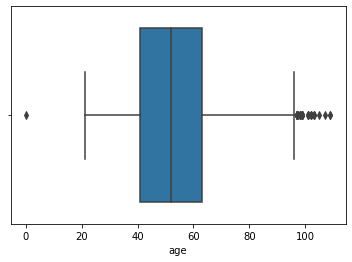

In [23]:
sns.boxplot(x=data['age'])  # vẽ box plot cho dữ liệu ở cột Quantity  # vẽ box plot cho dữ liệu ở cột Quantity

## Loại bỏ giá trị ngoại lai

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

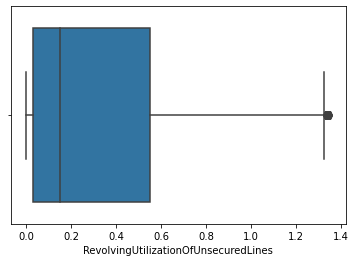

In [31]:
# Xử lý dữ liệu ngoại lai
#Xóa dữ liệu ngoại lai bằng IQR score
Q1 = data['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
Q3 = data['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)
IQR = Q3 - Q1

# xác định phần tử không phải ngoại lai
df6 = data
df6['outlier'] = ~((data['RevolvingUtilizationOfUnsecuredLines'] < (Q1 - 1.5*IQR)) | (data['RevolvingUtilizationOfUnsecuredLines'] > (Q3 + 1.5*IQR)))

# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

sns.boxplot(x=df6['RevolvingUtilizationOfUnsecuredLines'])  # vẽ box plot cho dữ liệu ở cột Quantity

## Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.


In [34]:
# Rời rạc hóa dữ liệu ở cột 'RevolvingUtilizationOfUnsecuredLines'

# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(data1['RevolvingUtilizationOfUnsecuredLines'], 4)
cats
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-50.708, 12677.0]    149982
(12677.0, 25354.0]         8
(25354.0, 38031.0]         1
(38031.0, 50708.0]         1
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

## Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [35]:
# định nghĩa khoảng giá trị các nhóm
bins = [0, 30, 40, 50, 80, 150]
# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(data1['age'],bins)
cats
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(50, 80]     74928
(40, 50]     35035
(30, 40]     24336
(0, 30]      10756
(80, 150]     4936
Name: age, dtype: int64

## Đặt tên bất kỳ cho các nhóm ở 2 ý trên.